# 1-1. MNIST 스케일 전처리 없이 모델 만들기

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print(f'훈련데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련데이터 (42000, 28, 28) 레이블 (42000,)
검증데이터 (18000, 28, 28) 레이블 (18000,)


In [4]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#255로 나누는 전처리 과정 생략
x_train = x_train.reshape((num_x_train, 28*28))
x_val = x_val.reshape((num_x_val, 28*28))
x_test = x_test.reshape((num_x_test, 28*28))

print(x_train.shape)

(42000, 784)


In [5]:
#레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 3.5965 - accuracy: 0.4001 - val_loss: 1.3739 - val_accuracy: 0.5538
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 1.0918 - accuracy: 0.6411 - val_loss: 0.9519 - val_accuracy: 0.6818
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.8322 - accuracy: 0.7170 - val_loss: 0.7818 - val_accuracy: 0.7545
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6611 - accuracy: 0.7869 - val_loss: 0.6720 - val_accuracy: 0.7854
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5544 - accuracy: 0.8203 - val_loss: 0.5367 - val_accuracy: 0.8488
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4320 - accuracy: 0.8837 - val_loss: 0.4702 - val_accuracy: 0.9020
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3566 - accuracy: 0.9074 - val_loss: 0.4307 - val_accuracy: 0.8978
Epoch 

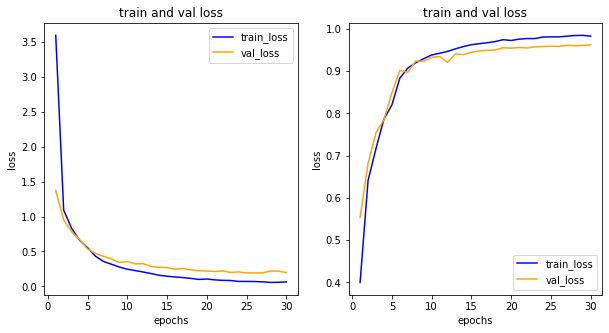

In [7]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color ='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

#학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color='orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [8]:
# 모델 평가하기
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)


#정확도가... 왜 더 높을까...?

313/313 [==============================] - 1s 2ms/step - loss: 0.1922 - accuracy: 0.9611

테스트 정확도: 0.9610999822616577


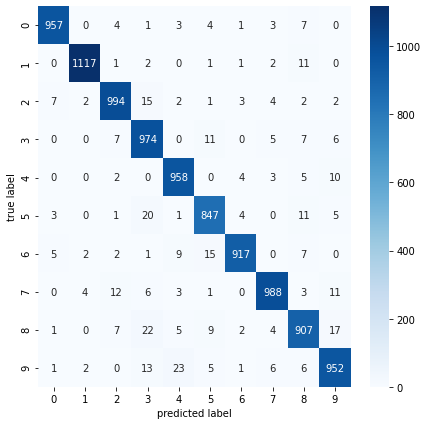

In [10]:
y_predict = model.predict(x_test)

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(y_predict, axis = -1))
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# 1-2. boston 집 값 예측 표준화적용 없이 모델 만들기

In [12]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=777)

In [14]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = model.fit(x_train, y_train, epochs=300, validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 21ms/step - loss: 9580.4902 - mae: 88.3851 - val_loss: 474.5883 - val_mae: 18.7539
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 415.8040 - mae: 16.7372 - val_loss: 949.7238 - val_mae: 28.0578
Epoch 3/300
9/9 [==============================] - 0s 9ms/step - loss: 916.8582 - mae: 27.7868 - val_loss: 408.9289 - val_mae: 18.1700
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 199.8348 - mae: 11.3228 - val_loss: 141.1483 - val_mae: 7.8110
Epoch 5/300
9/9 [==============================] - 0s 10ms/step - loss: 155.8189 - mae: 9.3570 - val_loss: 205.0645 - val_mae: 10.4910
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 120.3693 - mae: 7.9848 - val_loss: 96.7768 - val_mae: 6.5693
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 75.8872 - mae: 6.6482 - val_loss: 94.5633 - val_mae: 7.5320
Epoch 8/300
9/9 [==============================] - 0s 8ms/st

9/9 [==============================] - 0s 12ms/step - loss: 37.1177 - mae: 4.2082 - val_loss: 67.6220 - val_mae: 5.4746
Epoch 63/300
9/9 [==============================] - 0s 12ms/step - loss: 37.5313 - mae: 4.1154 - val_loss: 62.7441 - val_mae: 5.7123
Epoch 64/300
9/9 [==============================] - 0s 10ms/step - loss: 43.0149 - mae: 4.7152 - val_loss: 73.6283 - val_mae: 5.6370
Epoch 65/300
9/9 [==============================] - 0s 9ms/step - loss: 40.5810 - mae: 4.6052 - val_loss: 67.5711 - val_mae: 5.4360
Epoch 66/300
9/9 [==============================] - 0s 10ms/step - loss: 37.7037 - mae: 4.1792 - val_loss: 61.2378 - val_mae: 5.3783
Epoch 67/300
9/9 [==============================] - 0s 10ms/step - loss: 36.0024 - mae: 4.0892 - val_loss: 60.3144 - val_mae: 5.5539
Epoch 68/300
9/9 [==============================] - 0s 11ms/step - loss: 37.1914 - mae: 4.1483 - val_loss: 59.6238 - val_mae: 5.4149
Epoch 69/300
9/9 [==============================] - 0s 14ms/step - loss: 42.4137 - 

9/9 [==============================] - 0s 12ms/step - loss: 26.2938 - mae: 3.6954 - val_loss: 42.5637 - val_mae: 4.9391
Epoch 124/300
9/9 [==============================] - 0s 12ms/step - loss: 26.6446 - mae: 3.6618 - val_loss: 40.8088 - val_mae: 4.7832
Epoch 125/300
9/9 [==============================] - 0s 11ms/step - loss: 27.2467 - mae: 3.8118 - val_loss: 43.4880 - val_mae: 4.4958
Epoch 126/300
9/9 [==============================] - 0s 11ms/step - loss: 24.8775 - mae: 3.8782 - val_loss: 68.0591 - val_mae: 5.7883
Epoch 127/300
9/9 [==============================] - 0s 15ms/step - loss: 29.9605 - mae: 4.1239 - val_loss: 46.7219 - val_mae: 4.6473
Epoch 128/300
9/9 [==============================] - 0s 19ms/step - loss: 26.8330 - mae: 3.8089 - val_loss: 40.7977 - val_mae: 4.7908
Epoch 129/300
9/9 [==============================] - 0s 11ms/step - loss: 24.5397 - mae: 3.6594 - val_loss: 40.2748 - val_mae: 4.4979
Epoch 130/300
9/9 [==============================] - 0s 13ms/step - loss: 25

9/9 [==============================] - 0s 10ms/step - loss: 19.5610 - mae: 3.1598 - val_loss: 39.6170 - val_mae: 4.1459
Epoch 185/300
9/9 [==============================] - 0s 11ms/step - loss: 17.6331 - mae: 3.0606 - val_loss: 36.4768 - val_mae: 4.0979
Epoch 186/300
9/9 [==============================] - 0s 11ms/step - loss: 17.8690 - mae: 3.0062 - val_loss: 32.2976 - val_mae: 3.9646
Epoch 187/300
9/9 [==============================] - 0s 12ms/step - loss: 16.6657 - mae: 2.9358 - val_loss: 34.2655 - val_mae: 4.0111
Epoch 188/300
9/9 [==============================] - 0s 11ms/step - loss: 17.4701 - mae: 2.9700 - val_loss: 32.1469 - val_mae: 4.0120
Epoch 189/300
9/9 [==============================] - 0s 10ms/step - loss: 18.1534 - mae: 3.0577 - val_loss: 31.4508 - val_mae: 4.3605
Epoch 190/300
9/9 [==============================] - 0s 9ms/step - loss: 18.2464 - mae: 2.9884 - val_loss: 30.0652 - val_mae: 4.0985
Epoch 191/300
9/9 [==============================] - 0s 12ms/step - loss: 18.

9/9 [==============================] - 0s 9ms/step - loss: 15.8647 - mae: 2.9414 - val_loss: 36.9378 - val_mae: 4.0363
Epoch 246/300
9/9 [==============================] - 0s 10ms/step - loss: 17.4241 - mae: 3.0521 - val_loss: 46.3262 - val_mae: 4.7397
Epoch 247/300
9/9 [==============================] - 0s 10ms/step - loss: 18.5832 - mae: 3.0963 - val_loss: 40.2920 - val_mae: 4.3303
Epoch 248/300
9/9 [==============================] - 0s 10ms/step - loss: 18.6562 - mae: 3.1399 - val_loss: 38.3436 - val_mae: 4.1519
Epoch 249/300
9/9 [==============================] - 0s 9ms/step - loss: 16.3418 - mae: 2.8253 - val_loss: 29.8501 - val_mae: 3.7115
Epoch 250/300
9/9 [==============================] - 0s 10ms/step - loss: 17.1417 - mae: 2.9787 - val_loss: 33.1352 - val_mae: 3.8188
Epoch 251/300
9/9 [==============================] - 0s 11ms/step - loss: 18.1110 - mae: 3.0332 - val_loss: 28.3816 - val_mae: 3.6295
Epoch 252/300
9/9 [==============================] - 0s 11ms/step - loss: 15.9

In [15]:
model.evaluate(x_test, y_test)

# 확실히 표준화 했을 때보다 loss랑 mae값이 높음

4/4 [==============================] - 0s 3ms/step - loss: 25.8329 - mae: 3.6336


[25.83291244506836, 3.633599281311035]

# 2. Fashion-MNIST
## 2-1. 매우 적은 개수의 은닉 유닛과 적은 개수의 Dense층을 통한 학습

In [16]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [17]:
#전처리 및 검증데이터셋 만들기

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

In [29]:
model1 = Sequential()

# x_train = (x_train.reshape((60000, 28*28))) / 255

model1.add(Flatten(input_shape = (28,28)))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.8390 - accuracy: 0.7303 - val_loss: 0.5496 - val_accuracy: 0.8186
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5164 - accuracy: 0.8270 - val_loss: 0.4843 - val_accuracy: 0.8378
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.8389 - val_loss: 0.4656 - val_accuracy: 0.8408
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4460 - accuracy: 0.8454 - val_loss: 0.4376 - val_accuracy: 0.8523
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4301 - accuracy: 0.8511 - val_loss: 0.4427 - val_accuracy: 0.8457
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4156 - accuracy: 0.8559 - val_loss: 0.4192 - val_accuracy: 0.8564
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8581 - val_loss: 0.4295 - val_accuracy: 0.8511
Epoch 

In [30]:
# 모델 평가하기
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8511

테스트 정확도: 0.8511000275611877


In [35]:
keys = history1.history.keys()
keys = list(keys)
keys

['loss', 'accuracy', 'val_loss', 'val_accuracy']

In [48]:
his_dict = history1.history
temp = keys[0]
his_dict[temp][1:]

[0.5163900852203369,
 0.47263747453689575,
 0.4460206925868988,
 0.43014317750930786,
 0.41558218002319336,
 0.4076770842075348,
 0.399015337228775,
 0.39283162355422974,
 0.3869427442550659,
 0.38222622871398926,
 0.3774505853652954,
 0.37151899933815,
 0.3688644468784332,
 0.364305317401886,
 0.3614012897014618,
 0.36049801111221313,
 0.3558952510356903,
 0.35086768865585327,
 0.35026201605796814,
 0.3498920202255249,
 0.3465438187122345,
 0.3433696925640106,
 0.3400723934173584,
 0.33994683623313904,
 0.3398118317127228,
 0.33754128217697144,
 0.3344023525714874,
 0.3324226438999176,
 0.33142125606536865]

In [52]:
len(his_dict)
his_dict

{'loss': [0.8390160202980042,
  0.5163900852203369,
  0.47263747453689575,
  0.4460206925868988,
  0.43014317750930786,
  0.41558218002319336,
  0.4076770842075348,
  0.399015337228775,
  0.39283162355422974,
  0.3869427442550659,
  0.38222622871398926,
  0.3774505853652954,
  0.37151899933815,
  0.3688644468784332,
  0.364305317401886,
  0.3614012897014618,
  0.36049801111221313,
  0.3558952510356903,
  0.35086768865585327,
  0.35026201605796814,
  0.3498920202255249,
  0.3465438187122345,
  0.3433696925640106,
  0.3400723934173584,
  0.33994683623313904,
  0.3398118317127228,
  0.33754128217697144,
  0.3344023525714874,
  0.3324226438999176,
  0.33142125606536865],
 'accuracy': [0.7302619218826294,
  0.8270000219345093,
  0.8388809561729431,
  0.8454047441482544,
  0.8511190414428711,
  0.8558571338653564,
  0.8581190705299377,
  0.8605714440345764,
  0.8632143139839172,
  0.864047646522522,
  0.8661428689956665,
  0.8688333630561829,
  0.8704761862754822,
  0.8705714344978333,
  0.8

In [58]:
0%2

0

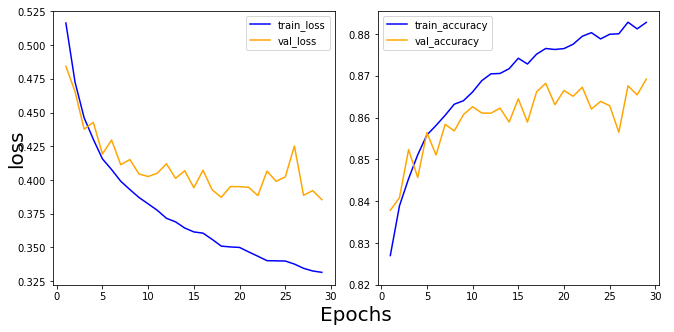

In [65]:
def draw_loss_acc(his, epochs):
    his_dict = his.history
    keys = list(his_dict.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    
    for i in range(2):
        temp_ax = fig.add_subplot(1,2,i+1)
        temp = keys[i]
        val_temp = keys[i+2]
        temp_ax.plot(epochs, his_dict[temp][1:], color= 'blue', label='train_'+temp)
        temp_ax.plot(epochs, his_dict[val_temp][1:], color='orange', label=val_temp)
        
        if i==1:
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
        
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history1, 30)

## 2-2. 책의 예제 코드를 통한 학습

In [24]:
model2 = Sequential()

# x_train = (x_train.reshape((60000, 28*28))) / 255

model2.add(Flatten(input_shape = (28,28)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6718 - accuracy: 0.7704 - val_loss: 0.4686 - val_accuracy: 0.8370
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4482 - accuracy: 0.8412 - val_loss: 0.4122 - val_accuracy: 0.8587
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8561 - val_loss: 0.3899 - val_accuracy: 0.8629
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8625 - val_loss: 0.3659 - val_accuracy: 0.8707
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3547 - accuracy: 0.8726 - val_loss: 0.3567 - val_accuracy: 0.8726
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8762 - val_loss: 0.3649 - val_accuracy: 0.8677
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8807 - val_loss: 0.3523 - val_accuracy: 0.8738
Epoch 

In [25]:
# 모델 평가하기
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8756

테스트 정확도: 0.8755999803543091


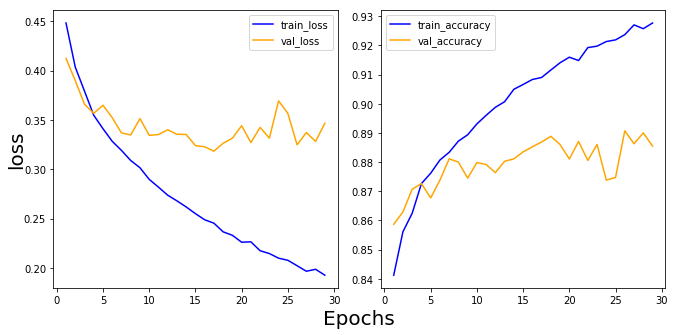

In [66]:
def draw_loss_acc(his, epochs):
    his_dict = his.history
    keys = list(his_dict.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    
    for i in range(2):
        temp_ax = fig.add_subplot(1,2,i+1)
        temp = keys[i]
        val_temp = keys[i+2]
        temp_ax.plot(epochs, his_dict[temp][1:], color= 'blue', label='train_'+temp)
        temp_ax.plot(epochs, his_dict[val_temp][1:], color='orange', label=val_temp)
        
        if i==1:
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
        
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history2, 30)

## 2-3. 매우 많은 개수의 은닉 유닛과 많은 개수의 Dense층을 통한 학습

In [26]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 7ms/step - loss: 0.5905 - accuracy: 0.7910 - val_loss: 0.4865 - val_accuracy: 0.8264
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4057 - accuracy: 0.8512 - val_loss: 0.3849 - val_accuracy: 0.8599
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3577 - accuracy: 0.8677 - val_loss: 0.3947 - val_accuracy: 0.8562
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3342 - accuracy: 0.8763 - val_loss: 0.3526 - val_accuracy: 0.8728
Epoch 5/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3112 - accuracy: 0.8857 - val_loss: 0.3307 - val_accuracy: 0.8798
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2958 - accuracy: 0.8896 - val_loss: 0.3185 - val_accuracy: 0.8844
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2763 - accuracy: 0.8973 - val_loss: 0.3384 - val_accuracy: 0.8808
Epoch 

In [27]:
# 모델 평가하기
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.8815

테스트 정확도: 0.8815000057220459


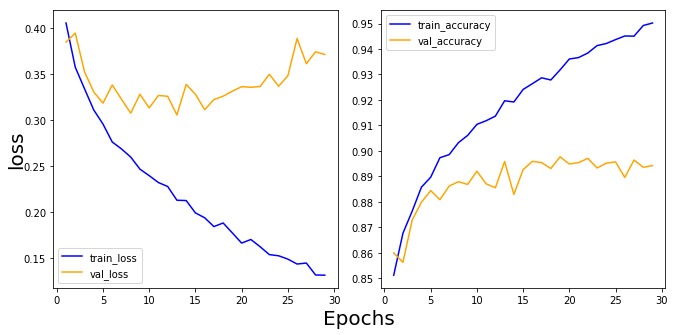

In [67]:
def draw_loss_acc(his, epochs):
    his_dict = his.history
    keys = list(his_dict.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    
    for i in range(2):
        temp_ax = fig.add_subplot(1,2,i+1)
        temp = keys[i]
        val_temp = keys[i+2]
        temp_ax.plot(epochs, his_dict[temp][1:], color= 'blue', label='train_'+temp)
        temp_ax.plot(epochs, his_dict[val_temp][1:], color='orange', label=val_temp)
        
        if i==1:
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
        
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history3, 30)

## 결론
- 은닉 유닛의 수를 많이 하고 층이 깊어질수록 과대적합이 빨리 일어난다